<a href="https://www.kaggle.com/code/hilalalpak/approaches-ds-salaries-dataset?scriptVersionId=178623066" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
df = pd.read_csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [2]:
df["work_year"].unique()
df["experience_level"].unique()
df["salary_currency"].value_counts()

array([2023, 2022, 2020, 2021])

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

salary_currency
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: count, dtype: int64

In [3]:
try_values = df.loc[df["salary_currency"] == "TRY", "salary_in_usd"]
print(try_values)

3597    12103
3624    20171
3634    28016
Name: salary_in_usd, dtype: int64


In [4]:
df = df.sort_values(by="salary_in_usd", ascending=False)
df = df.reset_index(drop=True)

In [5]:
df = df.drop(["salary", "salary_currency"], axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Research Scientist,450000,US,0,US,M
1,2022,MI,FT,Data Analyst,430967,GB,0,GB,M
2,2023,SE,FT,AI Scientist,423834,IL,0,IL,L
3,2021,MI,FT,Applied Machine Learning Scientist,423000,US,50,US,L
4,2021,EX,CT,Principal Data Scientist,416000,US,100,US,S


In [6]:
df["job_title"].nunique()

93

In [7]:
df.groupby("job_title").agg({"salary_in_usd": "median"}).sort_values(by="salary_in_usd", ascending=False).head(10)


,salary_in_usd
job_title,
Data Science Tech Lead,375000.0
Cloud Data Architect,250000.0
Data Lead,212500.0
Data Analytics Lead,211254.5
Head of Data,202500.0
Principal Data Engineer,192500.0
Applied Scientist,191737.5
Principal Machine Learning Engineer,190000.0
Data Science Manager,183780.0


In [8]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Research Scientist,450000,US,0,US,M
1,2022,MI,FT,Data Analyst,430967,GB,0,GB,M
2,2023,SE,FT,AI Scientist,423834,IL,0,IL,L
3,2021,MI,FT,Applied Machine Learning Scientist,423000,US,50,US,L
4,2021,EX,CT,Principal Data Scientist,416000,US,100,US,S


In [9]:
if "employee_residence" in df.columns and "company_location" in df.columns:
    count_not_equal = sum(df["employee_residence"] != df["company_location"])
    print(max(count_not_equal, 1))

96


> ALTERNATİF YOL1; 
         count_not_equal = df.apply(lambda row: 
                           row["employee_residence"] != row["company_location"], 
                           axis=1).sum()     
            print(max(count_not_equal, 1))

> ALTERNATİF YOL2;
       df.loc[df['employee_residence'] != df['company_location']].shape

In [10]:
df.groupby("work_year")["salary_in_usd"].agg({"sum", "mean", "max"}).astype(int)

,max,sum,mean
work_year,,,
2020,450000,7015000,92302
2021,423000,21640058,94087
2022,430967,221875465,133338
2023,423834,266046291,149045


In [11]:
df["work_year"].value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

**** It may be comparative as there is less data for 2020 and 2021 compared to other years.

In [12]:
import matplotlib.pyplot as plt

<Axes: xlabel='work_year'>

Text(0.5, 0, 'Work Year')

Text(0, 0.5, 'Salary in USD')

Text(0.5, 1.0, 'Salaries by Years')

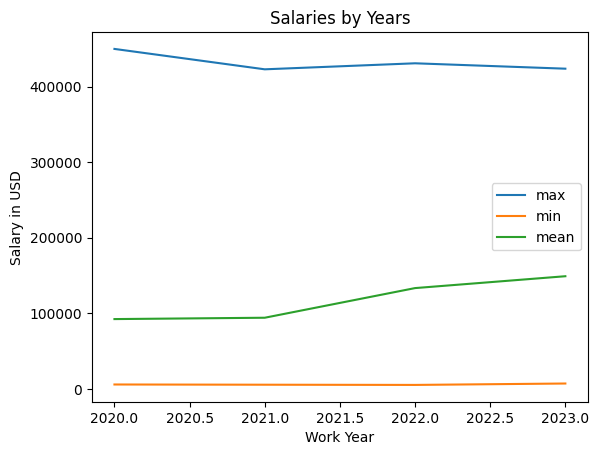

In [13]:
show = df.groupby("work_year")["salary_in_usd"].agg({"mean", "max", "min"}).astype(int)
show.plot(kind="line")
plt.xlabel("Work Year")
plt.ylabel("Salary in USD")
plt.title("Salaries by Years")

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

Text(0.5, 1.0, 'Salary in USD by Experience Level')

Text(0.5, 0, 'Experience Level')

Text(0, 0.5, 'Salary in USD')

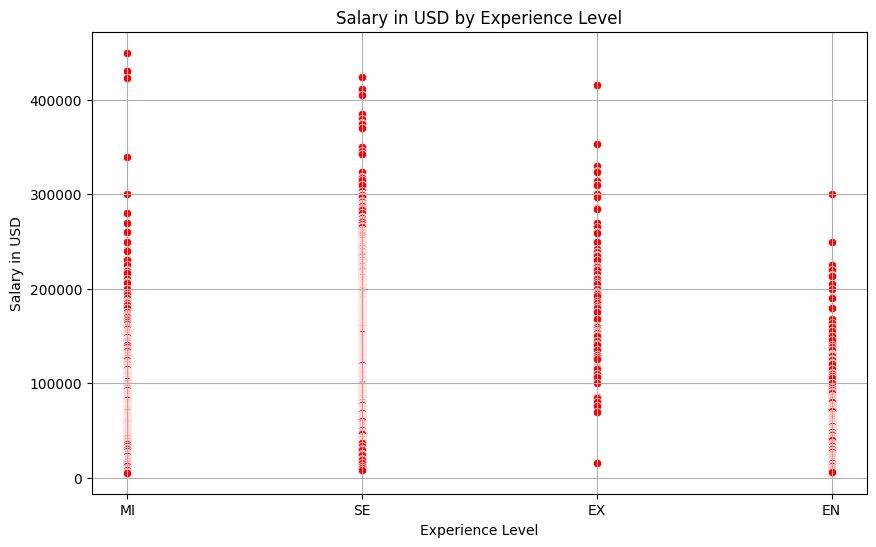

In [14]:
import seaborn as sns

salary_in_usd = df["salary_in_usd"]
experience_level = df["experience_level"]


plt.figure(figsize=(10, 6))
sns.scatterplot(x=experience_level, y=salary_in_usd, color='red', alpha=1)
plt.title("Salary in USD by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel('Salary in USD')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: ylabel='experience_level'>

Text(0.5, 1.0, 'Average Salary in USD by Experience Level')

Text(0.5, 36.58159722222221, 'Experience Level')

Text(95.72222222222221, 0.5, 'Average Salary in USD')

(array([0.5]), [Text(0.5, 0, 'salary_in_usd')])

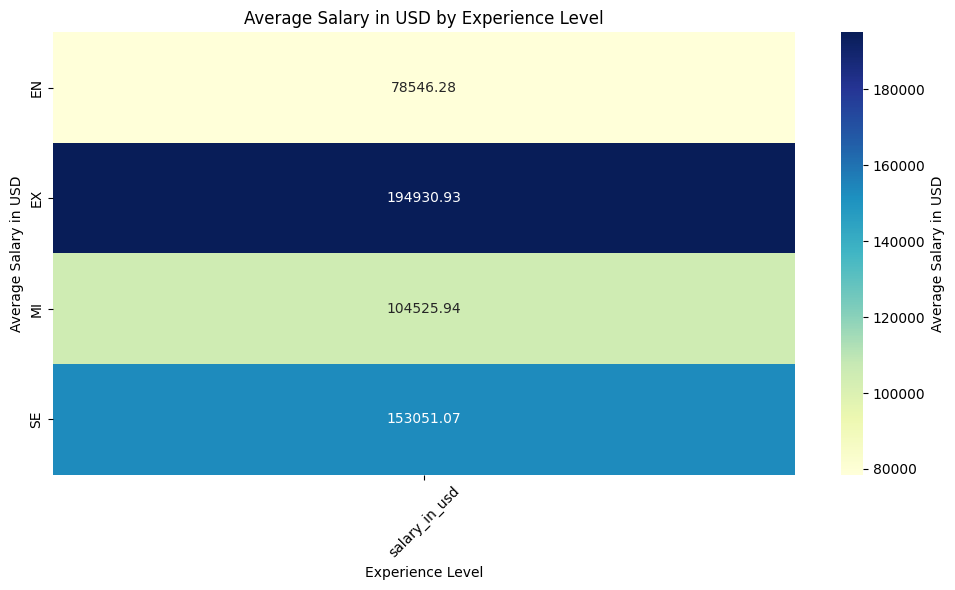

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.pivot_table(index='experience_level', values='salary_in_usd'), cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Average Salary in USD'})
plt.title('Average Salary in USD by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

(array([104., 263., 244., 138.,  38.,  12.,   2.,   1.,   0.,   3.]),
 array([  5132. ,  49618.8,  94105.6, 138592.4, 183079.2, 227566. ,
        272052.8, 316539.6, 361026.4, 405513.2, 450000. ]),
 <BarContainer object of 10 artists>)

(array([ 60., 250., 640., 733., 512., 222.,  60.,  24.,  11.,   4.]),
 array([  8000. ,  49583.4,  91166.8, 132750.2, 174333.6, 215917. ,
        257500.4, 299083.8, 340667.2, 382250.6, 423834. ]),
 <BarContainer object of 10 artists>)

(array([ 1.,  5., 18., 25., 25., 19.,  7., 12.,  1.,  1.]),
 array([ 15000.,  55100.,  95200., 135300., 175400., 215500., 255600.,
        295700., 335800., 375900., 416000.]),
 <BarContainer object of 10 artists>)

(array([73., 74., 69., 37., 35., 20.,  4.,  6.,  1.,  1.]),
 array([  5409. ,  34868.1,  64327.2,  93786.3, 123245.4, 152704.5,
        182163.6, 211622.7, 241081.8, 270540.9, 300000. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Salary in USD by Experience Level')

Text(0.5, 0, 'Salary in USD')

Text(0, 0.5, 'Experience Level')

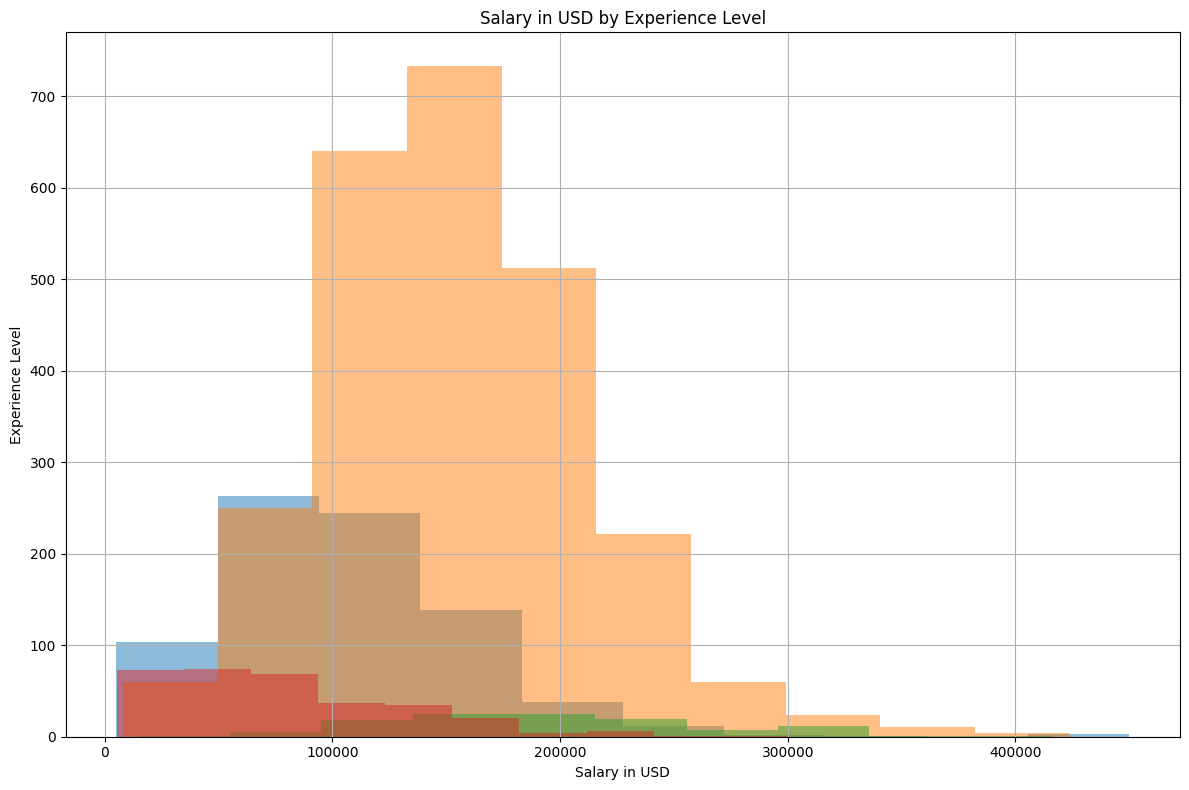

In [16]:
experience_levels = df["experience_level"].unique()

plt.figure(figsize=(12, 8))
for exp_level in experience_levels:
    plt.hist(df[df["experience_level"] == exp_level]["salary_in_usd"], alpha=0.5, label=exp_level)


plt.title('Salary in USD by Experience Level')
plt.xlabel('Salary in USD')
plt.ylabel('Experience Level')
plt.grid(True)
plt.tight_layout()
plt.show()